In [7]:
'''
Machine learning for the 1D beam finite element
Last Updated : 03/28/2019, by Hyungmin Jun (hyungminjun@outlook.com)

=============================================================================

Copyright 2019 Hyungmin Jun. All rights reserved.

License - GPL version 3
This program is free software: you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or any later version. This
program is distributed in the hope that it will be useful, but WITHOUT ANY
WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program. If not, see <http://www.gnu.org/licenses/>.
'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

from keras.models import Sequential
from keras.layers import Dense
from numpy.linalg import inv

%matplotlib inline

np.random.seed(1)

In [8]:
# Stiffness matrix for the beam finite element
def Stiffness_Beam(n_nde):
    
    # Define sectional and material properties
    L = 1000          # m
    E = 210000        # N/m**2
    I = 0.801*10**6   # m**4

    # The number of elements
    n_ele = n_nde - 1
    
    # The number of degrees of freedom
    n_dof = n_nde * 2    
    
    # Element stiffness matrix
    L_e = L / n_ele
    K_e = E*I/L_e**3 * np.matrix([
        [  12,     -6*L_e,    -12,     -6*L_e],
        [  -6*L_e,  4*L_e**2,   6*L_e,  2*L_e**2],
        [ -12,      6*L_e,     12,      6*L_e],
        [  -6*L_e,  2*L_e**2,   6*L_e,  4*L_e**2]])
    
    # Assemble stiffness matrix
    K_mat = np.zeros([n_dof, n_dof])
    for i in range(n_ele):
        K_mat[2*i:2*i+4, 2*i:2*i+4] += K_e
    
    return K_mat

In [9]:
# External force vector
def Ext_Force(n_dof):
    load = 1000*(np.random.random(n_nde)*2-1)

    # Force vector
    R = np.zeros(n_dof)
    R[0::2] = load
    return R[2:]

In [10]:
n_nde = 100
n_dof = 2*n_nde
K_mat = Stiffness_Beam(n_nde)

# Impose boundary conditions
K_mat = K_mat[2:, 2:]

# Inverse stiffness matrix
K_inv = inv(K_mat)

# Make force vector set
n_set = 10000
U_set = np.zeros([n_set, n_nde])
R_set = np.zeros([n_set, n_nde - 1])

for i in range(n_set):
    R = Ext_Force(n_dof)
    U = np.matmul(K_inv, R)

    v = U[0::2]
    v = np.insert(v, 0, 0)
    U_set[i, :] = v
    R_set[i, :] = R[0::2]


In [29]:
# Set train and test set with the ratio 8:2
x_train = R_set[0:int(n_set*0.8), :]*1/10000
y_train = U_set[0:int(n_set*0.8), :]
x_test  = R_set[int(n_set*0.8):, :]*1/10000
y_test  = U_set[int(n_set*0.8):, :]

# Set the train model
model = Sequential()
model.add(Dense(100, activation='tanh', input_shape=(i_dim,)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(n_nde, activation='linear'))

model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
Total params: 30,200
Trainable params: 30,200
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Train the model
hist = model.fit(x_train, y_train, epochs=50, verbose = 1)

Epoch 1/50
8000/8000 [==============================] - 1s 79us/step - loss: 2.2415 - acc: 0.2347
Epoch 2/50
8000/8000 [==============================] - 0s 36us/step - loss: 0.0536 - acc: 0.4481
Epoch 3/50
8000/8000 [==============================] - 0s 35us/step - loss: 0.0400 - acc: 0.4581
Epoch 4/50
8000/8000 [==============================] - 0s 37us/step - loss: 0.0304 - acc: 0.4768
Epoch 5/50
8000/8000 [==============================] - 0s 35us/step - loss: 0.0244 - acc: 0.4909
Epoch 6/50
8000/8000 [==============================] - 0s 35us/step - loss: 0.0203 - acc: 0.5045
Epoch 7/50
8000/8000 [==============================] - 0s 36us/step - loss: 0.0168 - acc: 0.5241
Epoch 8/50
8000/8000 [==============================] - 0s 36us/step - loss: 0.0152 - acc: 0.5363
Epoch 9/50
8000/8000 [==============================] - 0s 36us/step - loss: 0.0131 - acc: 0.5541
Epoch 10/50
8000/8000 [==============================] - 0s 36us/step - loss: 0.0118 - acc: 0.5683
Epoch 11/50
8000/80

KeyError: 'val_acc'

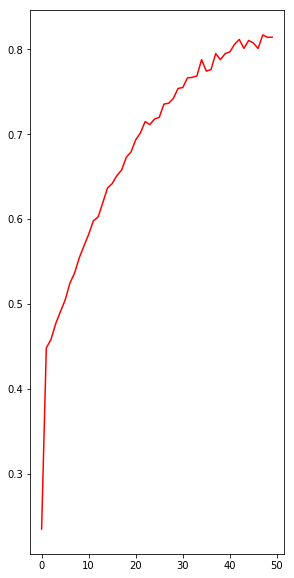

In [34]:
# ==================================================
# Predict
# ==================================================
pred_x = model.predict(x_test)

#print(hist)
#print(model.get_weights())

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')

plt.figure(figsize=(8, 5))
x = np.linspace(0, 1, n_nde)
plt.plot(x, np.transpose(pred_x[0:10,:]))
plt.plot(x, np.transpose(y_test[0:10,:]))
plt.show()

Epoch 1/50
8000/8000 [==============================] - 1s 74us/step - loss: 2.3089 - acc: 0.2806
Epoch 2/50
8000/8000 [==============================] - 0s 36us/step - loss: 0.0561 - acc: 0.4711
Epoch 3/50
8000/8000 [==============================] - 0s 37us/step - loss: 0.0416 - acc: 0.4809
Epoch 4/50
8000/8000 [==============================] - 0s 37us/step - loss: 0.0330 - acc: 0.4895
Epoch 5/50
8000/8000 [==============================] - 0s 37us/step - loss: 0.0261 - acc: 0.4990
Epoch 6/50
8000/8000 [==============================] - 0s 37us/step - loss: 0.0213 - acc: 0.5129
Epoch 7/50
8000/8000 [==============================] - 0s 38us/step - loss: 0.0178 - acc: 0.5255
Epoch 8/50
8000/8000 [==============================] - 0s 35us/step - loss: 0.0152 - acc: 0.5435
Epoch 9/50
8000/8000 [==============================] - 0s 35us/step - loss: 0.0143 - acc: 0.5563
Epoch 10/50
8000/8000 [==============================] - 0s 35us/step - loss: 0.0123 - acc: 0.5679
Epoch 11/50
8000/80

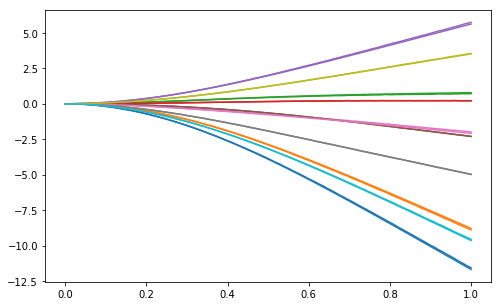

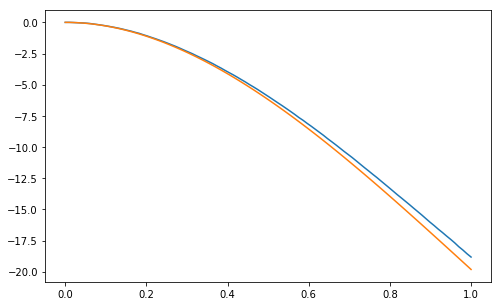

In [23]:
# Define point load
F     = np.zeros(n_dof - 2)
F[-2] = -10000

# Find reference solution
d = np.matmul(inv(K_mat), F)
dz = d[0::2]
dz = np.insert(dz, 0, 0)

f = F[0::2]*1/10000
pred = model.predict(np.reshape(f, (1,len(f))))

plt.figure(figsize=(8, 5))

plt.plot(x, pred[0])
plt.plot(x, dz)

plt.show()